# Perceptron

## Implementing a Perceptron using numpy 

## 1. Dataset Preparation

In [1]:
# Import numpy, standard library, and plot module.
import numpy as np
import os
import matplotlib.pyplot as plt

# Showing plots in Jupyter Notebook
%matplotlib inline

In [2]:
# Read in data and display
data = np.genfromtxt('toy_dataset.txt', delimiter='\t')
data

array([[ 0.77, -1.14,  0.  ],
       [-0.33,  1.44,  0.  ],
       [ 0.91, -3.07,  0.  ],
       [-0.37, -1.91,  0.  ],
       [-1.84, -1.13,  0.  ],
       [-1.5 ,  0.34,  0.  ],
       [-0.63, -1.53,  0.  ],
       [-1.08, -1.23,  0.  ],
       [ 0.39, -1.99,  0.  ],
       [-1.26, -2.9 ,  0.  ],
       [-5.27, -0.78,  0.  ],
       [-0.49, -2.74,  0.  ],
       [ 1.48, -3.74,  0.  ],
       [-1.64, -1.96,  0.  ],
       [ 0.45,  0.36,  0.  ],
       [-1.48, -1.17,  0.  ],
       [-2.94, -4.47,  0.  ],
       [-2.19, -1.48,  0.  ],
       [ 0.02, -0.02,  0.  ],
       [-2.24, -2.12,  0.  ],
       [-3.17, -3.69,  0.  ],
       [-4.09,  1.03,  0.  ],
       [-2.41, -2.31,  0.  ],
       [-3.45, -0.61,  0.  ],
       [-3.96, -2.  ,  0.  ],
       [-2.95, -1.16,  0.  ],
       [-2.42, -3.35,  0.  ],
       [-1.74, -1.1 ,  0.  ],
       [-1.61, -1.28,  0.  ],
       [-2.59, -2.21,  0.  ],
       [-2.64, -2.2 ,  0.  ],
       [-2.84, -4.12,  0.  ],
       [-1.45, -2.26,  0.  ],
       [-3

In [3]:
# Assign X into a matrix of the first two columns and y into an array of type int from third column
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
print(X,'\n')
print(y,'\n')
print('Class 0 and 1 counts:', np.bincount(y),'\n')
print('X dimension: ', X.shape,'\n')
print('y dimension: ', y.shape,'\n')

[[ 0.77 -1.14]
 [-0.33  1.44]
 [ 0.91 -3.07]
 [-0.37 -1.91]
 [-1.84 -1.13]
 [-1.5   0.34]
 [-0.63 -1.53]
 [-1.08 -1.23]
 [ 0.39 -1.99]
 [-1.26 -2.9 ]
 [-5.27 -0.78]
 [-0.49 -2.74]
 [ 1.48 -3.74]
 [-1.64 -1.96]
 [ 0.45  0.36]
 [-1.48 -1.17]
 [-2.94 -4.47]
 [-2.19 -1.48]
 [ 0.02 -0.02]
 [-2.24 -2.12]
 [-3.17 -3.69]
 [-4.09  1.03]
 [-2.41 -2.31]
 [-3.45 -0.61]
 [-3.96 -2.  ]
 [-2.95 -1.16]
 [-2.42 -3.35]
 [-1.74 -1.1 ]
 [-1.61 -1.28]
 [-2.59 -2.21]
 [-2.64 -2.2 ]
 [-2.84 -4.12]
 [-1.45 -2.26]
 [-3.98 -1.05]
 [-2.97 -1.63]
 [-0.68 -1.52]
 [-0.1  -3.43]
 [-1.14 -2.66]
 [-2.92 -2.51]
 [-2.14 -1.62]
 [-3.33 -0.44]
 [-1.05 -3.85]
 [ 0.38  0.95]
 [-0.05 -1.95]
 [-3.2  -0.22]
 [-2.26  0.01]
 [-1.41 -0.33]
 [-1.2  -0.71]
 [-1.69  0.8 ]
 [-1.52 -1.14]
 [ 3.88  0.65]
 [ 0.73  2.97]
 [ 0.83  3.94]
 [ 1.59  1.25]
 [ 3.92  3.48]
 [ 3.87  2.91]
 [ 1.14  3.91]
 [ 1.73  2.8 ]
 [ 2.95  1.84]
 [ 2.61  2.92]
 [ 2.38  0.9 ]
 [ 2.3   3.33]
 [ 1.31  1.85]
 [ 1.56  3.85]
 [ 2.67  2.41]
 [ 1.23  2.54]
 [ 1.33  2

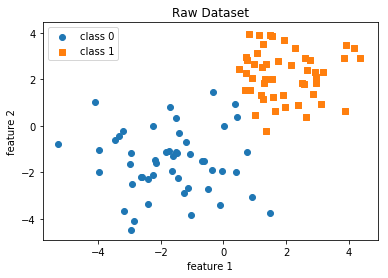

In [4]:
# Plot raw data
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Raw Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [5]:
# Shuffle X and y together and train/test split
shuffle_idx = np.arange(y.shape[0])
print(shuffle_idx)

shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)

X, y = X[shuffle_idx], y[shuffle_idx]
print(X)
print(y)

# Split dataset into 70% training and 30% test data
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0.39 -1.99]
 [ 0.51  2.44]
 [ 0.77  2.84]
 [-1.61 -1.28]
 [ 1.56  3.85]
 [ 0.77 -1.14]
 [-1.5   0.34]
 [ 3.88  0.65]
 [ 2.95  2.09]
 [-1.84 -1.13]
 [-3.45 -0.61]
 [ 1.23  2.54]
 [ 1.26  1.17]
 [ 2.38  0.9 ]
 [-3.96 -2.  ]
 [ 0.38  0.95]
 [ 1.9   1.34]
 [-2.92 -2.51]
 [ 1.14  3.91]
 [ 1.93  3.71]
 [-0.68 -1.52]
 [ 1.2   1.31]
 [-2.24 -2.12]
 [-2.59 -2.21]
 [-2.84 -4.12]
 [ 1.36 -0.22]
 [ 2.92  2.32]
 [-1.26 -2.9 ]
 [ 1.59  1.25]
 [-1.05 -3.85]
 [-4.09  1.03]
 [ 1.65  0.63]
 [-3.98 -1.05]
 [ 2.4   0.91]
 [ 3.19  2.32]
 [ 0.97  2.68]
 [ 0.71  2.27]
 [ 2.52  1.83]
 [ 1.31  1.85]
 [ 1.48 -3.74]
 [-3.17 -3.69]
 [ 1.54  2.02]
 [-1.14 -2.66]
 [ 2.61  2.92]
 [-0.33  1.44]
 [ 0.68  1.54]
 [-0

In [6]:
# Standardize both training and test datasets
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

# Verification of normalizing process X~N(0,1)
print('Mean of X_train:',np.round(X_train.mean(axis=0),1))
print('Standard deviation of X_train:',X_train.std(axis=0))

Mean of X_train: [0. 0.]
Standard deviation of X_train: [1. 1.]


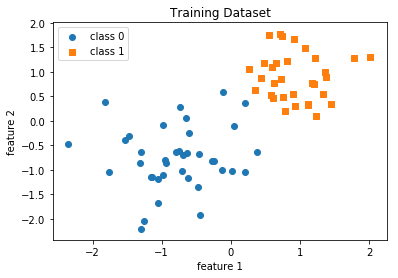

In [7]:
# Plot training dataset
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

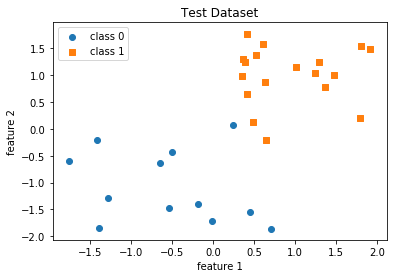

In [8]:
# Plot test dataset
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 2. Perceptron Implementation

Step 1: All of the inputs x are multiplied by their weights w

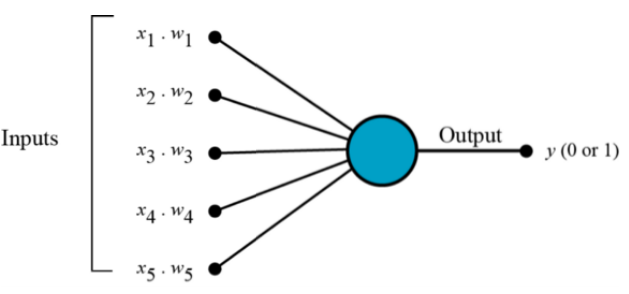


Step 2: Add all multiplied values and assign them as "Weighted Sum"

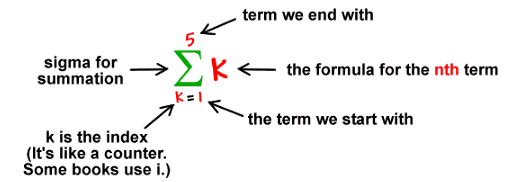

Step 3: Apply that weighted sum to the correct Activation function

Source: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53

In [9]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float) # Weights = number of features
        self.bias = np.zeros(1, dtype=np.float)                    # Bias is a single value
         
    def forward(self, x):
        net_inputs = np.dot(x, self.weights) + self.bias
        predictions = np.where(net_inputs > 0., 1, 0)              
        return predictions
    
    def backward(self, x, y):
        predictions = self.forward(x)                              # Implement the prediction (Sign function)
        errors = y - predictions                                   # Compute errors from outputs (Error function)
        return errors
    
    def train(self, x, y, epochs):                                 # Training epoch iterations
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [10]:
# Model Parameters: x = weights, b = biases
p = Perceptron(num_features=2)
p.train(X_train, y_train, epochs=5)

print('Model parameters:\n')
print('Weights:', p.weights,'\n')
print('Bias:', p.bias)

Model parameters:

Weights: [[1.27340847]
 [1.34642288]] 

Bias: [-1.]


## 3. Data accuracy and visualization

In [11]:
# Implement evaluate function to test the accuracy of data
acc = p.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (acc*100))

Test set accuracy: 93.33%


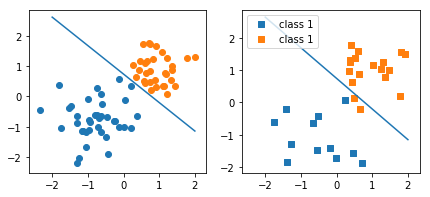

In [12]:
# Visualize both training and test datasets
w = p.weights
b = p.bias

# Since x0*w0 + x1*w1 + b = 0, x1 = (-x0*w0 - b) / w1
x0_min = -2
x1_min = ((-(w[0] * x0_min) - b[0]) / w[1])

x0_max = 2
x1_max = ((-(w[0] * x0_max) - b[0]) / w[1])

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,3))

# Plot the training data set (LHS)
ax[0].plot([x0_min,x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 0', marker='o')

# Plot the test data set (RHS)
ax[1].plot([x0_min,x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 1', marker='s')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()